<a href="https://colab.research.google.com/github/kihagama/hero/blob/main/perfectallmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Application : ARIMA RMSE = 21.815 | R² = -0.843


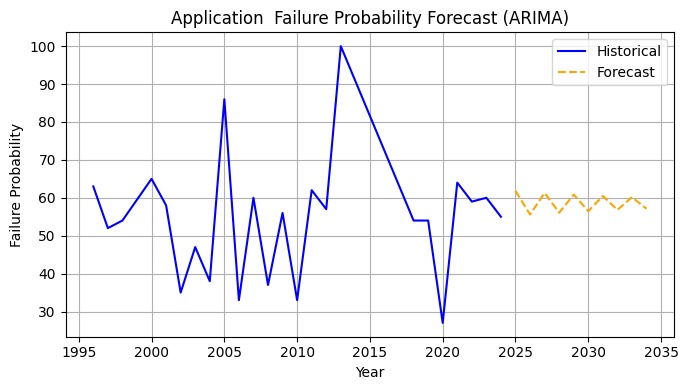

Admision : ARIMA RMSE = 28.586 | R² = -1.071


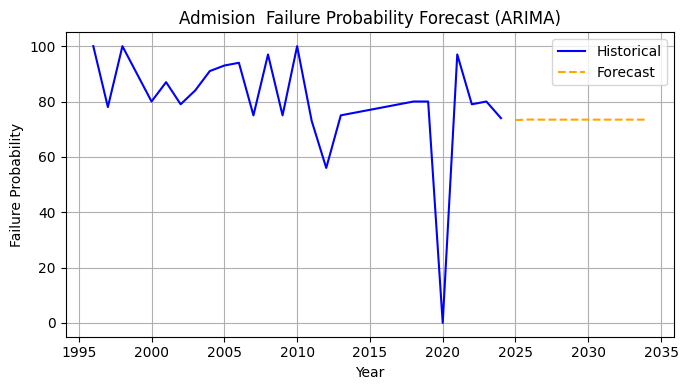

Academic: ARIMA RMSE = 18.531 | R² = -15.941


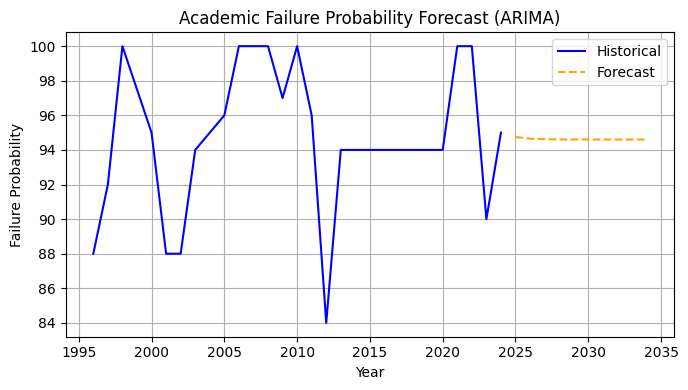

student Portal: ARIMA RMSE = 23.236 | R² = -2.521


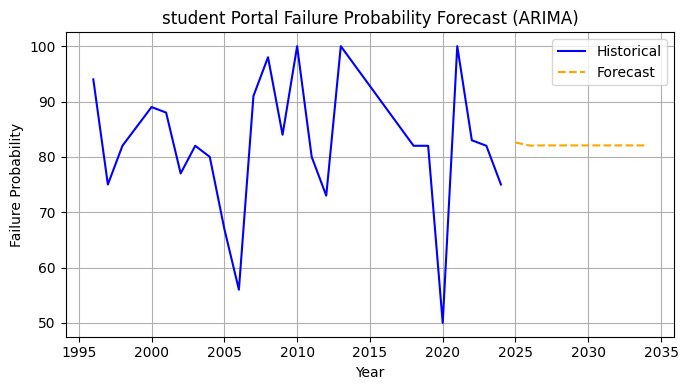


--- Forecasted Failure Probabilities (2025–2035) ---
      Application   Admision   Academic  student Portal
2025        61.825     73.301    94.747          82.593
2026        55.579     73.485    94.654          82.030
2027        61.296     73.437    94.621          82.072
2028        56.063     73.450    94.608          82.069
2029        60.852     73.446    94.604          82.069
2030        56.469     73.447    94.602          82.069
2031        60.480     73.447    94.601          82.069
2032        56.809     73.447    94.601          82.069
2033        60.169     73.447    94.601          82.069
2034        57.094     73.447    94.601          82.069


['arima_forecast_results.jb']

In [34]:

# SOFTWARE RELIABILITY PREDICTION (AIMS)
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import joblib as jb

# --- Load dataset ---
data = pd.read_csv("cleaned_data.csv")

# --- Ensure 'year' column is integer and set as index ---
data['year'] = data['year'].astype(int)
data.set_index('year', inplace=True)

# --- Define forecast range ---
forecast_years = list(range(2025, 2035))

# --- Store results ---
predictions = {}

# --- Function to train ARIMA model ---
def fit_arima(series):
    try:
        model = ARIMA(series, order=(1, 1, 1))
        fit = model.fit()
        forecast = fit.forecast(steps=10)
        return forecast, fit
    except Exception as e:
        print(f"ARIMA failed for series '{series.name}': {e}")
        return pd.Series([np.nan]*10, index=forecast_years), None

# --- Loop through each module ---
for module in data.columns:
    series = data[module].dropna()

    # Skip if too short for ARIMA
    if len(series) < 5:
        print(f"Skipping {module}: not enough data points.")
        continue

    # Fit ARIMA model
    forecast, model_fit = fit_arima(series)
    predictions[module] = forecast.values

    # --- Evaluate model performance ---
    if model_fit is not None:
        fitted_vals = model_fit.fittedvalues
        overlap = min(len(fitted_vals), len(series))
        y_true = series[-overlap:]
        y_pred = fitted_vals[-overlap:]

        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        r2 = r2_score(y_true, y_pred)

        print(f"{module}: ARIMA RMSE = {rmse:.3f} | R² = {r2:.3f}")
    else:
        print(f"{module}: Model failed, no metrics computed.")

    # --- Plot actual vs forecast ---
    plt.figure(figsize=(7,4))
    plt.plot(series.index, series, color='blue', label="Historical")
    plt.plot(forecast_years, forecast, color='orange', linestyle='--', label="Forecast")
    plt.title(f"{module} Failure Probability Forecast (ARIMA)")
    plt.xlabel("Year")
    plt.ylabel("Failure Probability")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Convert predictions into DataFrame ---
pred_df = pd.DataFrame(predictions, index=forecast_years)

print("\n--- Forecasted Failure Probabilities (2025–2035) ---")
print(pred_df.round(3))

# --- Optional: Save Forecasts to CSV ---
pred_df.to_csv("arima_forecast_results.csv", index_label='Year')
jb.dump(pred_df, "arima_forecast_results.jb")


Model Performance:
R² Score: -0.9928
Mean Squared Error: 378.0500

--- Forecasted Failure Probabilities (2025–2035) ---
      Application   Admision   Academic  student Portal
2025          55.0       74.0      95.0            75.0
2026          55.0       74.0      95.0            75.0
2027          55.0       74.0      95.0            75.0
2028          55.0       74.0      95.0            75.0
2029          55.0       74.0      95.0            75.0
2030          55.0       74.0      95.0            75.0
2031          55.0       74.0      95.0            75.0
2032          55.0       74.0      95.0            75.0
2033          55.0       74.0      95.0            75.0
2034          55.0       74.0      95.0            75.0


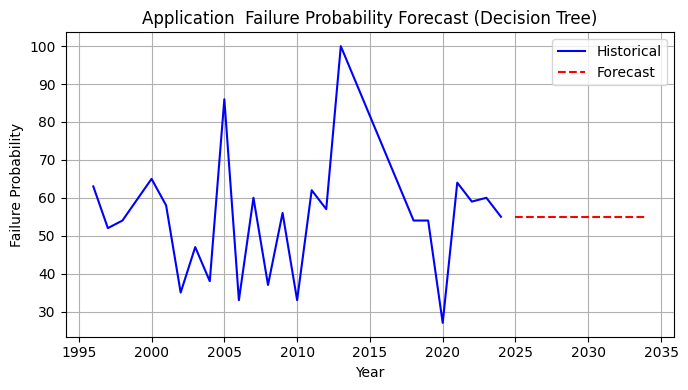

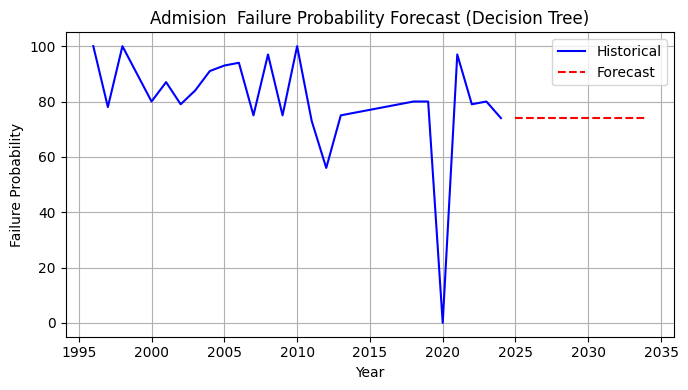

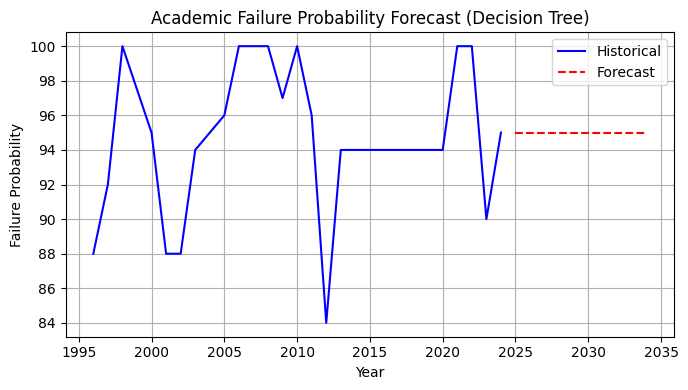

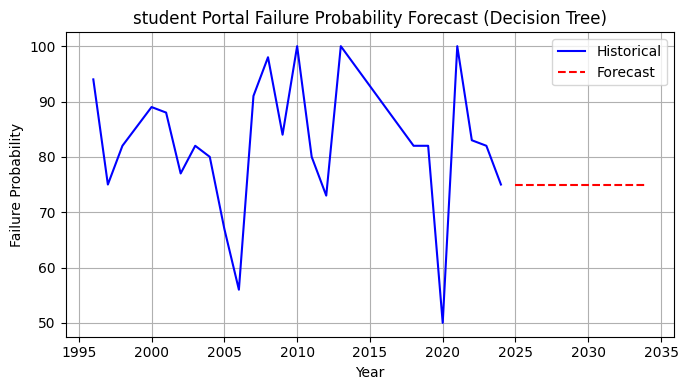

In [22]:
# -----------------------------
# SOFTWARE RELIABILITY PREDICTION (AIMS)
# Decision Tree Regression Version
# -----------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# --- Load dataset ---
data = pd.read_csv("cleaned_data.csv")

# --- Separate input (year) and output (modules) ---
X = data[['year']]
y = data.drop(columns=['year'])

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Initialize and Train Model ---
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# --- Evaluate Model Performance ---
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nModel Performance:")
print(f"R² Score: {score:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# --- Forecast Next 10 Years (2025–2035) ---
forecast_years = list(range(2025, 2035))
future_years = np.array(forecast_years).reshape(-1, 1)
future_predictions = model.predict(future_years)

# --- Combine into a DataFrame ---
pred_df = pd.DataFrame(future_predictions, columns=y.columns, index=forecast_years)
print("\n--- Forecasted Failure Probabilities (2025–2035) ---")
print(pred_df.round(3))

# --- Plot Actual vs Forecast for Each Module ---
for module in y.columns:
    plt.figure(figsize=(7,4))

    # Historical Data
    plt.plot(data['year'], data[module], label="Historical", color='blue')

    # Forecast Data
    plt.plot(forecast_years, pred_df[module], label="Forecast", linestyle='--', color='red')

    # Title and Labels
    plt.title(f"{module} Failure Probability Forecast (Decision Tree)")
    plt.xlabel("Year")
    plt.ylabel("Failure Probability")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Optional: Save Forecasts to CSV ---
pred_df.to_csv("decision_tree_forecast.csv", index_label='Year')



Model Performance:
R² Score: -0.3312
Mean Squared Error: 299.6462

--- Forecasted Failure Probabilities (2025–2035) ---
      Application   Admision    Academic  student Portal
2025         58.27      81.82  91.724998       82.302002
2026         58.27      81.82  91.724998       82.302002
2027         58.27      81.82  91.724998       82.302002
2028         58.27      81.82  91.724998       82.302002
2029         58.27      81.82  91.724998       82.302002
2030         58.27      81.82  91.724998       82.302002
2031         58.27      81.82  91.724998       82.302002
2032         58.27      81.82  91.724998       82.302002
2033         58.27      81.82  91.724998       82.302002
2034         58.27      81.82  91.724998       82.302002


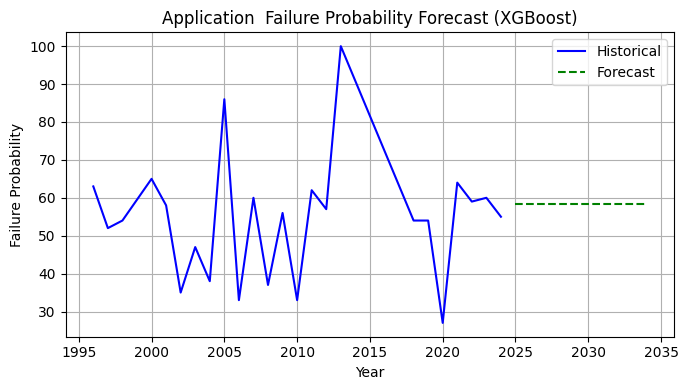

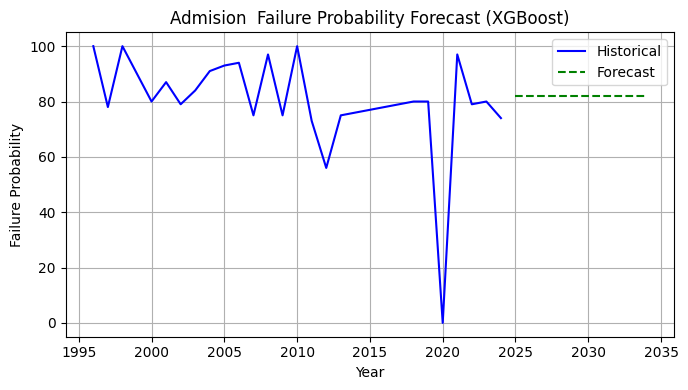

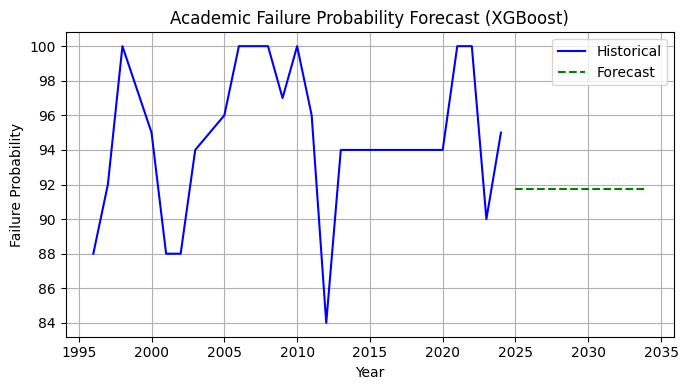

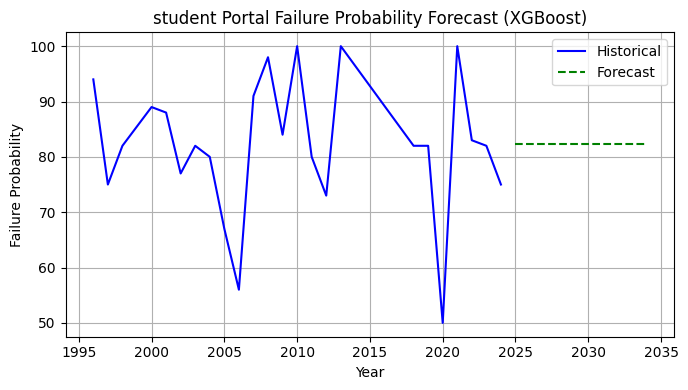

In [24]:
# -----------------------------
# SOFTWARE RELIABILITY PREDICTION (AIMS)
# XGBOOST REGRESSION MODEL VERSION
# -----------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# --- Load Dataset ---
data = pd.read_csv("cleaned_data.csv")

# --- Prepare Features and Labels ---
X = data[['year']]
y = data.drop(columns=['year'])

# --- Split the Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Initialize and Train the Model ---
model = XGBRegressor(
    n_estimators=55,       # Number of boosting rounds
    learning_rate=0.05,    # Small learning rate for stable training
    max_depth=2,           # Tree depth (shallow due to simple data)
    random_state=42
)

model.fit(X_train, y_train)

# --- Evaluate Model ---
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nModel Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# --- Forecast for Next 10 Years (2025–2035) ---
forecast_years = list(range(2025, 2035))
future_years = np.array(forecast_years).reshape(-1, 1)
future_predictions = model.predict(future_years)

# --- Combine Predictions into DataFrame ---
pred_df = pd.DataFrame(future_predictions, columns=y.columns, index=forecast_years)
print("\n--- Forecasted Failure Probabilities (2025–2035) ---")
print(pred_df.round(3))

# --- Plot Historical vs Forecast for Each Module ---
for module in y.columns:
    plt.figure(figsize=(7,4))

    # Historical Data
    plt.plot(data['year'], data[module], label='Historical', color='blue')

    # Forecast Data
    plt.plot(forecast_years, pred_df[module], label='Forecast', linestyle='--', color='green')

    plt.title(f"{module} Failure Probability Forecast (XGBoost)")
    plt.xlabel("Year")
    plt.ylabel("Failure Probability")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Optional: Save Forecasts to CSV ---
pred_df.to_csv("xgboost_forecast.csv", index_label='Year')



Model Performance:
R² Score: -0.3061
Mean Squared Error: 288.7211

--- Forecasted Failure Probabilities (2025–2035) ---
      Application   Admision   Academic  student Portal
2025        53.480     65.990    95.652          79.063
2026        53.644     65.195    95.705          78.970
2027        53.809     64.400    95.759          78.877
2028        53.973     63.605    95.813          78.783
2029        54.137     62.810    95.866          78.690
2030        54.301     62.015    95.920          78.596
2031        54.465     61.220    95.974          78.503
2032        54.630     60.425    96.027          78.410
2033        54.794     59.630    96.081          78.316
2034        54.958     58.835    96.134          78.223


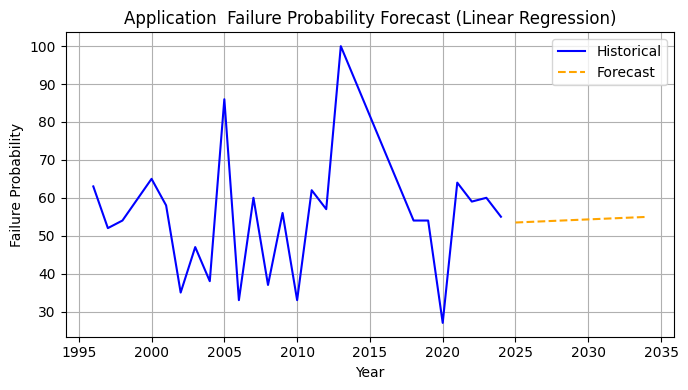

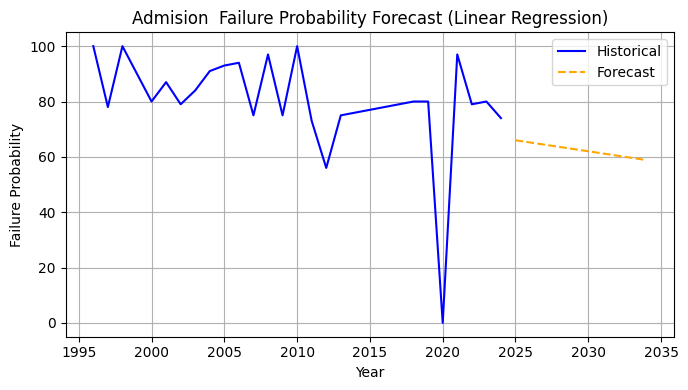

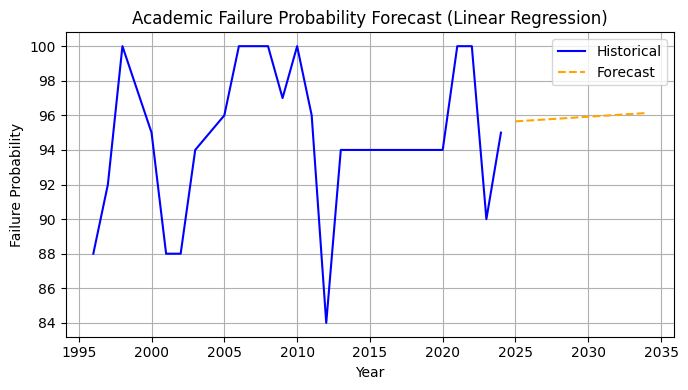

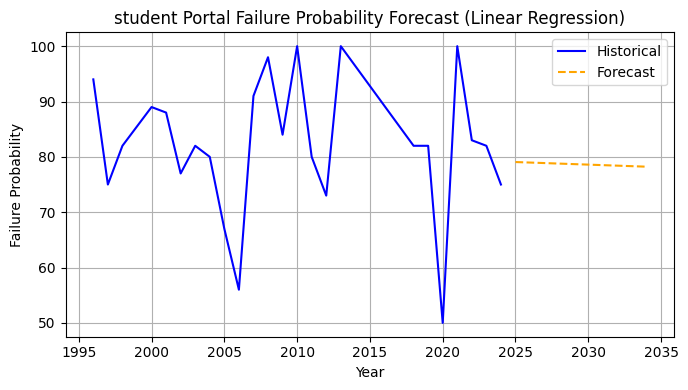

In [26]:
# -----------------------------
# SOFTWARE RELIABILITY PREDICTION (AIMS)
# LINEAR REGRESSION MODEL VERSION
# -----------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# --- Load Dataset ---
data = pd.read_csv("cleaned_data.csv")

# --- Prepare Features and Targets ---
X = data[['year']]               # Independent variable
y = data.drop(columns=['year'])  # Dependent variables (multiple modules)

# --- Split the Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Initialize and Train the Model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Evaluate Model ---
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nModel Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# --- Forecast for Next 10 Years (2025–2035) ---
forecast_years = list(range(2025, 2035))
future_years = np.array(forecast_years).reshape(-1, 1)
future_predictions = model.predict(future_years)

# --- Combine into DataFrame ---
pred_df = pd.DataFrame(future_predictions, columns=y.columns, index=forecast_years)
print("\n--- Forecasted Failure Probabilities (2025–2035) ---")
print(pred_df.round(3))

# --- Plot Historical vs Forecast for Each Module ---
for module in y.columns:
    plt.figure(figsize=(7,4))

    # Plot historical data
    plt.plot(data['year'], data[module], color='blue', label='Historical')

    # Plot forecasted data
    plt.plot(forecast_years, pred_df[module], color='orange', linestyle='--', label='Forecast')

    # Chart details
    plt.title(f"{module} Failure Probability Forecast (Linear Regression)")
    plt.xlabel("Year")
    plt.ylabel("Failure Probability")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Optional: Save Forecasts to CSV ---
pred_df.to_csv("linear_regression_forecast.csv", index_label='Year')



Model Performance:
R² Score: -0.6838
Mean Squared Error: 350.6386

--- Forecasted Failure Probabilities (2025–2035) ---
      Application   Admision   Academic  student Portal
2025        56.565      76.09     94.24           77.82
2026        56.565      76.09     94.24           77.82
2027        56.565      76.09     94.24           77.82
2028        56.565      76.09     94.24           77.82
2029        56.565      76.09     94.24           77.82
2030        56.565      76.09     94.24           77.82
2031        56.565      76.09     94.24           77.82
2032        56.565      76.09     94.24           77.82
2033        56.565      76.09     94.24           77.82
2034        56.565      76.09     94.24           77.82


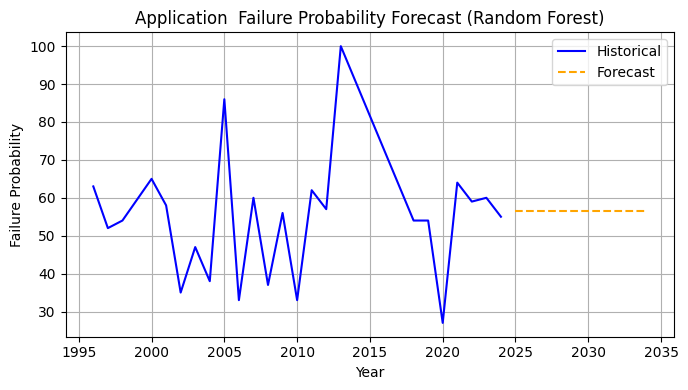

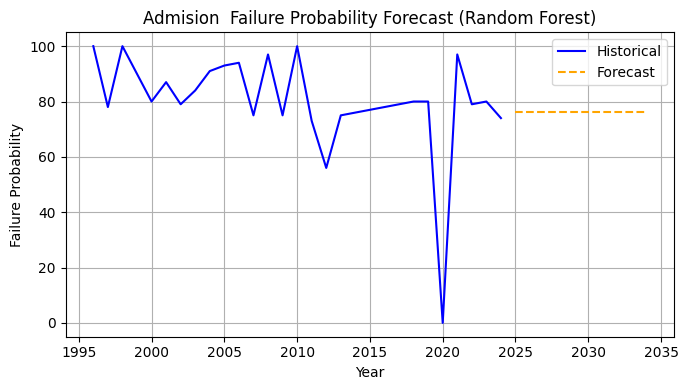

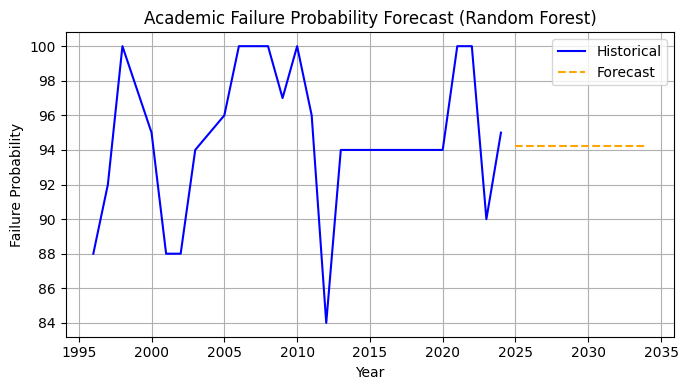

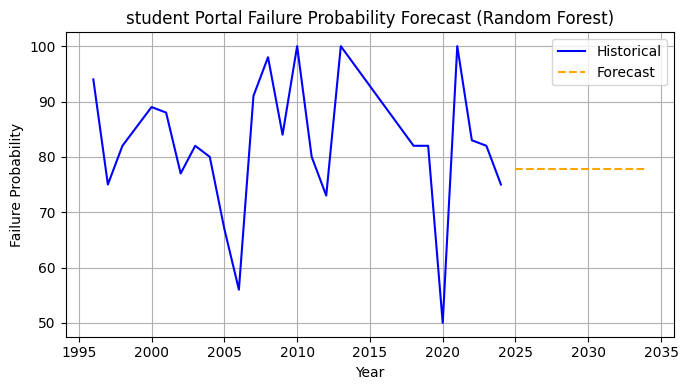

In [29]:
# -----------------------------
# SOFTWARE RELIABILITY PREDICTION (AIMS)
# RANDOM FOREST REGRESSOR MODEL VERSION
# -----------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# --- Load Dataset ---
data = pd.read_csv("cleaned_data.csv")

# --- Prepare Features and Targets ---
X = data[['year']]               # Independent variable
y = data.drop(columns=['year'])  # Dependent variables (multiple modules)

# --- Split the Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Initialize and Train the Model ---
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# --- Evaluate Model ---
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nModel Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# --- Forecast for Next 10 Years (2025–2035) ---
forecast_years = list(range(2025, 2035))
future_years = np.array(forecast_years).reshape(-1, 1)
future_predictions = model.predict(future_years)

# --- Combine into DataFrame ---
pred_df = pd.DataFrame(future_predictions, columns=y.columns, index=forecast_years)
print("\n--- Forecasted Failure Probabilities (2025–2035) ---")
print(pred_df.round(3))

# --- Plot Historical vs Forecast for Each Module ---
for module in y.columns:
    plt.figure(figsize=(7,4))

    # Plot historical data
    plt.plot(data['year'], data[module], color='blue', label='Historical')

    # Plot forecasted data
    plt.plot(forecast_years, pred_df[module], color='orange', linestyle='--', label='Forecast')

    # Chart details
    plt.title(f"{module} Failure Probability Forecast (Random Forest)")
    plt.xlabel("Year")
    plt.ylabel("Failure Probability")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Optional: Save Forecasts to CSV ---
pred_df.to_csv("random_forest_forecast.csv", index_label='Year')



Model Performance:
R² Score: -0.6603
Mean Squared Error: 333.3407

--- Forecasted Failure Probabilities (2025–2035) ---
      Application   Admision   Academic  student Portal
2025        55.894     85.631    94.876          80.277
2026        56.039     93.546    94.703          80.952
2027        56.061    102.829    94.507          81.774
2028        55.948    113.566    94.287          82.751
2029        55.685    125.839    94.042          83.895
2030        55.261    139.732    93.773          85.215
2031        54.661    155.329    93.477          86.722
2032        53.874    172.712    93.155          88.426
2033        52.884    191.967    92.805          90.336
2034        51.680    213.175    92.426          92.463


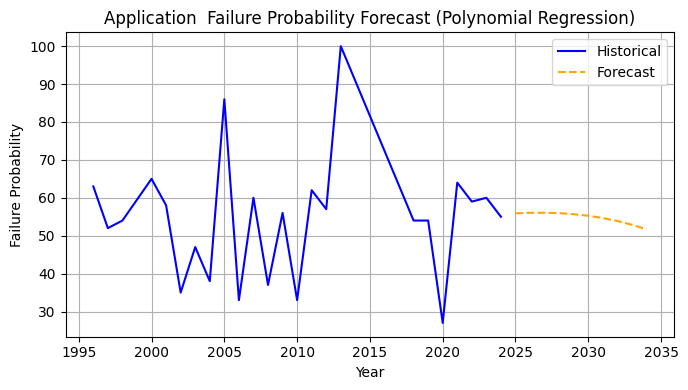

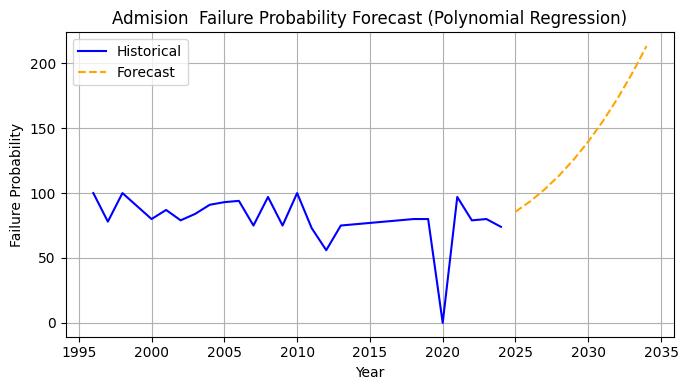

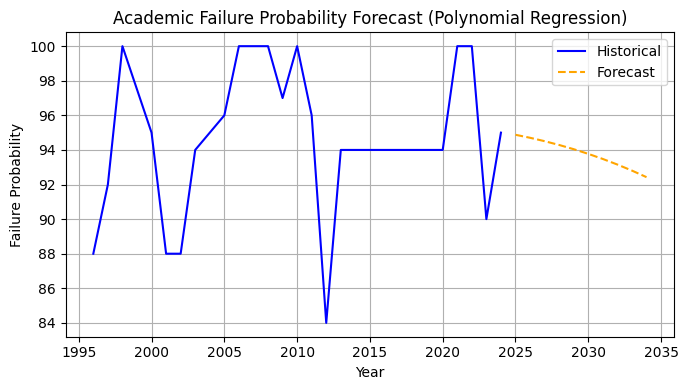

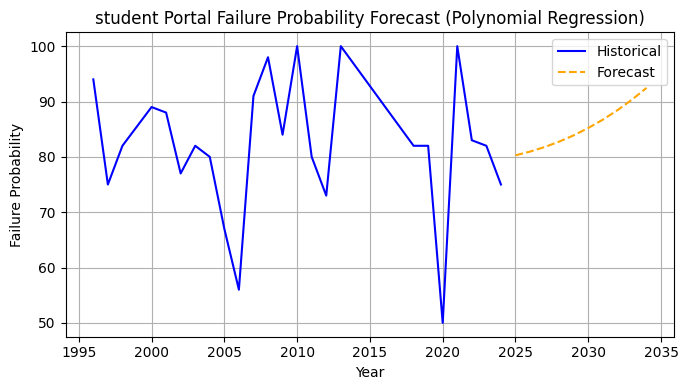

In [30]:
# -----------------------------
# SOFTWARE RELIABILITY PREDICTION (AIMS)
# POLYNOMIAL REGRESSION MODEL VERSION
# -----------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# --- Load Dataset ---
data = pd.read_csv("cleaned_data.csv")

# --- Prepare Features and Targets ---
X = data[['year']]               # Independent variable
y = data.drop(columns=['year'])  # Dependent variables (multiple modules)

# --- Generate Polynomial Features ---
poly = PolynomialFeatures(degree=3)  # You can adjust degree (2, 3, or 4)
X_poly = poly.fit_transform(X)

# --- Split the Data ---
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# --- Initialize and Train the Model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Evaluate Model ---
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nModel Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# --- Forecast for Next 10 Years (2025–2035) ---
forecast_years = list(range(2025, 2035))
future_years = np.array(forecast_years).reshape(-1, 1)
future_poly = poly.transform(future_years)
future_predictions = model.predict(future_poly)

# --- Combine into DataFrame ---
pred_df = pd.DataFrame(future_predictions, columns=y.columns, index=forecast_years)
print("\n--- Forecasted Failure Probabilities (2025–2035) ---")
print(pred_df.round(3))

# --- Plot Historical vs Forecast for Each Module ---
for module in y.columns:
    plt.figure(figsize=(7,4))

    # Plot historical data
    plt.plot(data['year'], data[module], color='blue', label='Historical')

    # Plot forecasted data
    plt.plot(forecast_years, pred_df[module], color='orange', linestyle='--', label='Forecast')

    # Chart details
    plt.title(f"{module} Failure Probability Forecast (Polynomial Regression)")
    plt.xlabel("Year")
    plt.ylabel("Failure Probability")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Optional: Save Forecasts to CSV ---
pred_df.to_csv("polynomial_regression_forecast.csv", index_label='Year')
